# <center> Callysto Project: </center>
#### <center> An educational resource for </center> <center> data analytics and computational thinking </center>

### <center> R. Hoshino, B. Klaff, M. Lamoureux </center>

#### <center> CMS 2018 - Vancouver </center>

In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import matplotlib.animation as animation
from IPython.display import HTML




## Outline

1. Jupyter notebooks
2. CanCode Initiative
3. Computational Thinking
4. Callysto Project with Jupyter
5. Call to Action


## What is a Jupyter notebook?

1. A broswer-based document.

2. Text, Latex, graphics, multimedia, live code.

3. Easily sharable, modifiable, usable. 

### LaTeX: Einstein's most famous formula
$$ E = mc^2 $$

Next fragment, we can edit Einstein's equation directly, to fix his "blunder."

### Also, "The biggest blunder of my life."

$$ R_{\mu \nu} - \frac{1}{2} R g_{\mu \nu}   + \Lambda g_{\mu \nu} 
= \frac{8\pi G}{c^4} T_{\mu \nu}.$$

## Graphics: plots and animation 

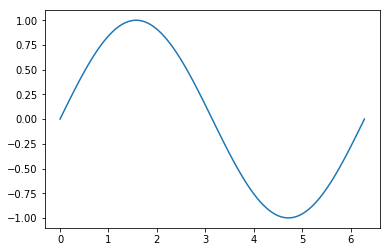

In [2]:
fig, ax = subplots()

x = linspace(0, 2*pi, 100)
line, = ax.plot(x, sin(x));


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(sin(x + 2*pi*i / 100))  # update the data.
    return line,


In [3]:
ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=20, blit=True, save_count=100) 

In [4]:
HTML(ani.to_html5_video())

## Importing familiar tools

In [5]:
%%html
<script src="https://cdn.geogebra.org/apps/deployggb.js"></script>

In [6]:
%%html
<div id="ggb-point"></div>
<script> var ggbApp = new GGBApplet({"height":600,"showToolBar":true,"showMenuBar":true,"showAlgebraInput":false,"showResetIcon":true,"enableLabelDrags": false,"enableRightClick":false,"enableShiftDragZoom":true,"useBrowserForJS":false,"filename":"geo-test.ggb"}, 'ggb-point'); ggbApp.inject();</script>

## Examples:

1. This presentation is a notebook!

2. Access [callysto.ca](https://callysto.ca/learning_modules/) for samples

3. Michael's [examples](http://bit.ly/cally-shorts2), 
Richard's [examples](http://bit.ly/CallystoRichard)

<img src="CanCode.png" alt="Screen shot of Callysto.ca" width="800"/>

## Computational Thinking

1. Breakdown a problem
2. Look for patterns,trends in problems
3. Abstraction
4. Format a general solution
5. Analyze and evaluate the solution

1. Breakdown a problem

2. Look for patterns or trends among the problems

3. Abstraction

4. Format a general solution

5. Analyze and evaluate the solution

Core steps to computational thinking:

1. Breakdown a problem

Take a large and complex problem, and break it down into smaller, more manageable problems or steps

2. Look for patterns or trends among the problems

Identify or generate data which is useful to the problems

3. Abstraction

Remove unnecessary detail from the problem

4. Format a general solution

Once the problem is broken down accordingly, take those pieces, solve them individually, and put them together logically into a complete solution

5. Analyze and evaluate the solution

<img src="Page1.png" alt="Screen shot of Callysto.ca" width="800"/>

<img src="Cybera_PIMS.png" alt="Screen shot of Cybera, PIMS" width="800"/>

Students working at the board, WPGA.
<img src="WPGA2.JPG" alt="Students working at the board, WPGA" width="800"/>

Students at Templeton School
<img src="Templeton2.JPG" alt="Students at Templeton School." width="800"/>

Teachers workshop at St. Leo.
<img src="StLeo7.JPG" alt="Teachers workshop at St. Leo." width="800"/>

## Fun stuff

- interaction
- animations
- videos, GIFS, images

In [7]:
%%writefile f1.template
<!DOCTYPE html>
<html>
    <meta http-equiv="Content-Type" content="text/html;charset=utf-8"/>
    <script type="text/javascript" src="https://mbostock.github.io/d3/talk/20111018/d3/d3.js"></script>
    <script type="text/javascript" src="https://mbostock.github.io/d3/talk/20111018/d3/d3.geom.js"></script>
    <script type="text/javascript" src="https://mbostock.github.io/d3/talk/20111018/d3/d3.layout.js"></script>
    <style type="text/css">

circle {
  stroke: #000;
  stroke-opacity: .5;
}

    </style>
  <body>
    <div id="body">
    <script type="text/javascript">

var w = {width},
    h = {height};

var nodes = d3.range({ball_count}).map(function() { return {radius: Math.random() * {rad_fac} + {rad_min}}; }),
    color = d3.scale.category10();

var force = d3.layout.force()
    .gravity(0.1)
    .charge(function(d, i) { return i ? 0 : -2000; })
    .nodes(nodes)
    .size([w, h]);

var root = nodes[0];
root.radius = 0;
root.fixed = true;

force.start();

var svg = d3.select("#body").append("svg:svg")
    .attr("width", w)
    .attr("height", h);

svg.selectAll("circle")
    .data(nodes.slice(1))
  .enter().append("svg:circle")
    .attr("r", function(d) { return d.radius - 2; })
    .style("fill", function(d, i) { return color(i % {color_count}); });

force.on("tick", function(e) {
  var q = d3.geom.quadtree(nodes),
      i = 0,
      n = nodes.length;

  while (++i < n) {
    q.visit(collide(nodes[i]));
  }

  svg.selectAll("circle")
      .attr("cx", function(d) { return d.x; })
      .attr("cy", function(d) { return d.y; });
});

svg.on("mousemove", function() {
  var p1 = d3.svg.mouse(this);
  root.px = p1[0];
  root.py = p1[1];
  force.resume();
});

function collide(node) {
  var r = node.radius + 16,
      nx1 = node.x - r,
      nx2 = node.x + r,
      ny1 = node.y - r,
      ny2 = node.y + r;
  return function(quad, x1, y1, x2, y2) {
    if (quad.point && (quad.point !== node)) {
      var x = node.x - quad.point.x,
          y = node.y - quad.point.y,
          l = Math.sqrt(x * x + y * y),
          r = node.radius + quad.point.radius;
      if (l < r) {
        l = (l - r) / l * .5;
        node.x -= x *= l;
        node.y -= y *= l;
        quad.point.x += x;
        quad.point.y += y;
      }
    }
    return x1 > nx2
        || x2 < nx1
        || y1 > ny2
        || y2 < ny1;
  };
}

    </script>
  </body>
</html>

Overwriting f1.template


In [8]:
from IPython.display import IFrame
import re

def replace_all(txt,d):
    rep = dict((re.escape('{'+k+'}'), str(v)) for k, v in d.items())
    pattern = re.compile("|".join(rep.keys()))
    return pattern.sub(lambda m: rep[re.escape(m.group(0))], txt)    

count=0
def serve_html(s,w,h):
    import os
    global count
    count+=1
    fn= '__tmp'+str(os.getpid())+'_'+str(count)+'.html'
    with open(fn,'w') as f:
        f.write(s)
    return IFrame('files/'+fn,w,h)

def f1(w=500,h=400,ball_count=150,rad_min=2,rad_fac=11,color_count=3):
    d={
       'width'      :w,
       'height'     :h,
       'ball_count' :ball_count,
       'rad_min'    :rad_min,
       'rad_fac'    :rad_fac,
       'color_count':color_count
       }
    with open('f1.template','r') as f:
        s=f.read()
    s= replace_all(s,d)        
    return serve_html(s,w+30,h+30)

In [9]:
f1(ball_count=50, color_count=17, rad_fac=10, rad_min=3, w=600)

In [10]:
from IPython.display import IFrame

In [11]:
%%writefile myFile.html
<!DOCTYPE html>
<html>
<head>
    <script src="//cdnjs.cloudflare.com/ajax/libs/d3/4.8.0/d3.min.js"></script>
    <script src="//unpkg.com/d3-force-bounce"></script>
    <script src="//unpkg.com/d3-force-constant"></script>
</head>

<style>
body {
    margin: 0;
    text-align: center;
}

.ball {
    cursor: grab;
    cursor: -webkit-grab;
}

.ball:active {
    cursor: grabbing;
    cursor: -webkit-grabbing;
}
</style>

<body>
    <svg id="canvas">
        <defs>
            <radialGradient id="sphere-gradient">
                <stop offset="0%" stop-color="MediumPurple"></stop>
                <stop offset="100%" stop-color="Indigo"></stop>
            </radialGradient>
        </defs>
    </svg>
</body>

<script>

var width = 400, height = 400
const BALL_SIZE = 20,
	BALL_OFFSET = window.innerHeight/8,
	BALL_SPEED = 3;

const canvasWidth = window.innerWidth,
	canvasHeight = window.innerHeight;

// DOM nodes
const svgCanvas = d3.select('svg#canvas')
		.attr('width', canvasWidth)
		.attr('height', canvasHeight),
	wiresG = svgCanvas.append('g'),
	ballsG = svgCanvas.append('g');

const balls = [
		{ id: '0', init: { x: canvasWidth/2 - 6*BALL_SIZE, y: canvasHeight*1/3, vx: 0, vy: 0 } },
		{ id: '1', init: { x: canvasWidth/2 - 3*BALL_SIZE, y: canvasHeight*(1/3 + .01), vx: 0, vy: 0 } },
		{ id: '2', init: { x: canvasWidth/2 - 0*BALL_SIZE, y: canvasHeight*1/3, vx: 0, vy: 0 } },
		{ id: '3', init: { x: canvasWidth/2 + 3*BALL_SIZE, y: canvasHeight*1/3, vx: 0, vy: 0 } },
		{ id: '4', init: { x: canvasWidth/2 + 6*BALL_SIZE, y: canvasHeight*1/3, vx: 0, vy: 0 } }
	];

	// start the left ball moving
	balls[0].init.x -= BALL_OFFSET;
	balls[0].init.y -= 0;
    balls[0].init.vx = BALL_SPEED;

let init = false;

const forceSim = d3.forceSimulation()
	.alphaDecay(0)
	.velocityDecay(0)
	.nodes([...balls])
	.force('elastic', d3.forceBounce()
		.radius(node => BALL_SIZE)
        .elasticity(1)
	)
	.force('init', () => {
		if (!init) {
			balls.forEach((ball) => {
				ball.x = ball.init.x;
				ball.y = ball.init.y;
				ball.vx = ball.init.vx;
				ball.vy = ball.init.vy;
			});
			init = true;
		}
	})
	.on('tick', () => { ballDigest(); });

//

// Periodical kickstart
kickStart();
setInterval(kickStart, 5000);

function ballDigest() {
	let ball = ballsG.selectAll('circle.ball').data(balls);

	ball.exit().remove();

	ball.merge(
		ball.enter().append('circle')
			.classed('ball', true)
			.attr('r', BALL_SIZE)
			.attr('fill', 'url(#sphere-gradient)')
			.call(d3.drag()
				.on("start", d => { d.fx = d.x; d.fy = d.y; })
				.on("drag", d => { d.fx = d3.event.x; d.fy = d3.event.y; })
				.on("end", d => { d.fx = null; d.fy = null; })
			)
	)
		.attr('cx', d => d.x)
		.attr('cy', d => d.y);
}

function kickStart() {
			balls.forEach((ball) => {
				ball.x = ball.init.x;
				ball.y = ball.init.y;
				ball.vx = ball.init.vx;
				ball.vy = ball.init.vy;
			});
}


  </script>
</html>

Overwriting myFile.html


In [12]:
IFrame('myFile.html',500,500)

### Call to Action

What can you do?


1. Use notebooks yourself.   http://intro.syzygy.ca


2. Get teachers to use it.  https://hub.callysto.ca

3. Develop and share notebooks with others. 

### <center> Thank you! </center>
